# Homework 7: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [1]:
# WRITE YOUR CODE HERE
setwd("/Users/jjimmyk/downloads")

Lexical_Data <- read.csv("LexicalData_withIncorrect.csv")
Items <- read.csv("Items.csv")

head(Lexical_Data)
head(Items)

library(tidyverse)

##Combine the two data frames, considering D_Word and Word columns to contain
## same data.
combined_data <- left_join(Lexical_Data,Items, by=c("D_Word"="Word"))

head(combined_data)

##Remove Freq_HAL variable.
combined_data <- subset(combined_data, select = -Freq_HAL)

head(combined_data)

combined_data <- na.omit(combined_data)
head(combined_data)


,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>
1,1,157,1,1,710,browse,false,-0.437,1
2,2,67,1,1,"1,094",refrigerant,false,0.825,1
3,3,120,1,1,587,gaining,false,-0.645,1
4,4,21,1,1,984,cheerless,false,0.025,1
5,5,236,1,1,577,pattered,false,-0.763,1
6,6,236,2,1,715,conjures,false,-0.364,1


,Occurrences,Word,Length,Freq_HAL,Log_Freq_HAL
,<int>,<chr>,<int>,<chr>,<dbl>
1,1,synergistic,11,284,5.649
2,1,synonymous,10,951,6.858
3,1,syntactical,11,114,4.736
4,1,synthesis,9,"6,742",8.816
5,1,synthesized,11,"2,709",7.904
6,1,synthesizer,11,"1,390",7.237


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Occurrences,Length,Freq_HAL,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,2,6,"7,016",8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,3,11,104,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,4,7,"4,039",8.304
4,4,21,1,1,984,cheerless,false,0.025,1,4,9,14,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,4,8,4,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,4,8,194,5.268


,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Occurrences,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,2,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,3,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,4,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,4,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,4,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,4,8,5.268


,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Occurrences,Length,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,2,6,8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,3,11,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,4,7,8.304
4,4,21,1,1,984,cheerless,false,0.025,1,4,9,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,4,8,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,4,8,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

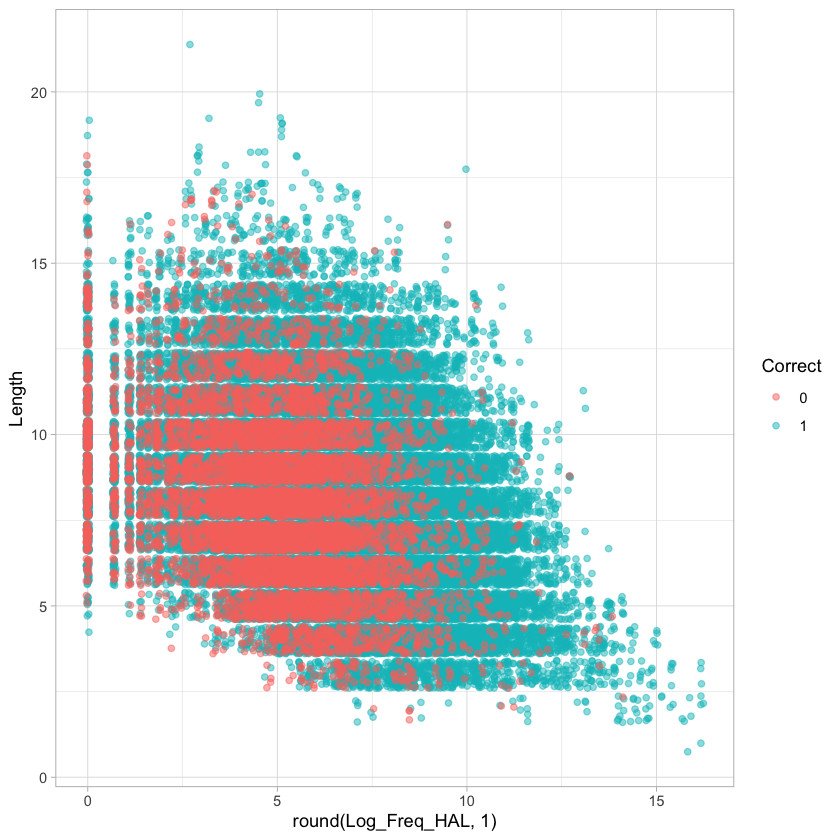

In [2]:
combined_data$Correct <- as.factor(combined_data$Correct)

ggplot(combined_data, aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) +
  geom_point(position = "jitter",alpha=0.5) +
  theme_light()


What do you observe about the "Correct" and "Incorrect" clusters? 


> There seems to be a greater spread, greater variance, in the Correct cluster than in the Incorrect cluster. Correct responses appear to include larger Log_Freq_HAL values and greater Length values than do incorrect responses.

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [3]:
# WRITE YOUR CODE HERE
glm.fit = glm(Correct~Log_Freq_HAL+Length+Length:Log_Freq_HAL, data = combined_data, family = binomial)
summary(glm.fit)



Call:
glm(formula = Correct ~ Log_Freq_HAL + Length + Length:Log_Freq_HAL, 
    family = binomial, data = combined_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL:Length -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

> *Write your response here* 
> Judging by the AIC score, this model appears much more effective at predicting Correct than HW6's models are at predicting response time.

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [4]:
# WRITE YOUR CODE HERE

Correct_Value <- combined_data$Correct

glm.probs = predict(glm.fit, combined_data, type = "response")

glm.pred = rep("Incorrect", nrow(combined_data))

glm.pred[glm.probs>0.5]="Correct"

confusion_df = data.frame(glm.pred, Correct_Value)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))


           actual
predicted       0     1
  Correct    7966 62566
  Incorrect    13    44

[1] "Accuracy: 0"


Did the model do well at predicting lexical decision correctness? Why or why not? 

> This model is not effective at predicting decision correctness.  This may be because there is a difference in the variance of the distributions of Correct and Incorrect values.

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [5]:
# WRITE YOUR CODE HERE
install.packages("MASS")
library(MASS)

qda.fit = qda(Correct~Log_Freq_HAL+Length+Length:Log_Freq_HAL, data = combined_data, family = binomial)
summary(qda.fit)
qda.fit



  There is a binary version available but the source version is later:
     binary source needs_compilation
MASS 7.3-55 7.3-56              TRUE



installing the source package ‘MASS’



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




        Length Class  Mode     
prior    2     -none- numeric  
counts   2     -none- numeric  
means    6     -none- numeric  
scaling 18     -none- numeric  
ldet     2     -none- numeric  
lev      2     -none- character
N        1     -none- numeric  
call     4     -none- call     
terms    3     terms  call     
xlevels  0     -none- list     

Call:
qda(Correct ~ Log_Freq_HAL + Length + Length:Log_Freq_HAL, data = combined_data, 
    family = binomial)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
  Log_Freq_HAL   Length Log_Freq_HAL:Length
0     4.932123 8.047124            37.95260
1     6.444849 7.979971            49.34219

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [6]:
# WRITE YOUR CODE HERE
qda.class = predict(qda.fit, combined_data)$class
table(qda.class, Correct_Value)
print(paste("Accuracy:",mean(qda.class==Correct_Value)))


         Correct_Value
qda.class     0     1
        0   455  1647
        1  7524 60963

[1] "Accuracy: 0.870078907478502"


How does QDA prediction performance differ from that of logistic regression?

> QDA performance is much better than that of logistic regression. 

**DUE:** 5pm EST, March 25, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
Marc Levesque
